# id:19-19--19 

In this **assignment** you’ll use sklearn to train and evaluate **Lasso regression models** on the
data you downloaded. Recall that Lasso regression uses a linear model and mean square
cost function with an L1 penalty and that the L1 penalty has a weight parameter C in the
lecture notes (weight parameter α = 1/(2C) in sklearn)

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline




In [8]:
df = []
with open('week3.php', 'r') as f:
    i = f.readlines()
    print(i[0])
    i = i[1:]
    data = [line.strip() for line in i]
    data = [d.split(",") for d in data]
    df = pd.DataFrame(data, columns=['x_1','x_2','output'])

# id:19-19--19 



#### (i) 
(a) Plot the data you downloaded as a 3D scatter plot i.e. with the first feature on
the -axis, the second feature in the y-axis and the target on the z-axis. You
can use the matplotlib scatter function for this, e..g for training data with two
features X and target y
```
import m a t p l o t l i b . p y p l o t a s p l t
from m p l t o o l k i t s . mplot3d import Axes3D
f i g = p l t . f i g u r e ( )
ax = f i g . a d d s u b p l o t ( 1 1 1 , p r o j e c t i o n =’3d ’ )
ax . s c a t t e r (X [ : , 0 ] , X [ : , 1 ] , y )
```
Does it look like the training data lies on a plane or a curve?

In [9]:
# file_path = '/Users/naman/sem_1_2025_26/machine_learning/week_3_assignment/week3'
# df, str = load_php_dataset(file_path)
df = df.astype(float)




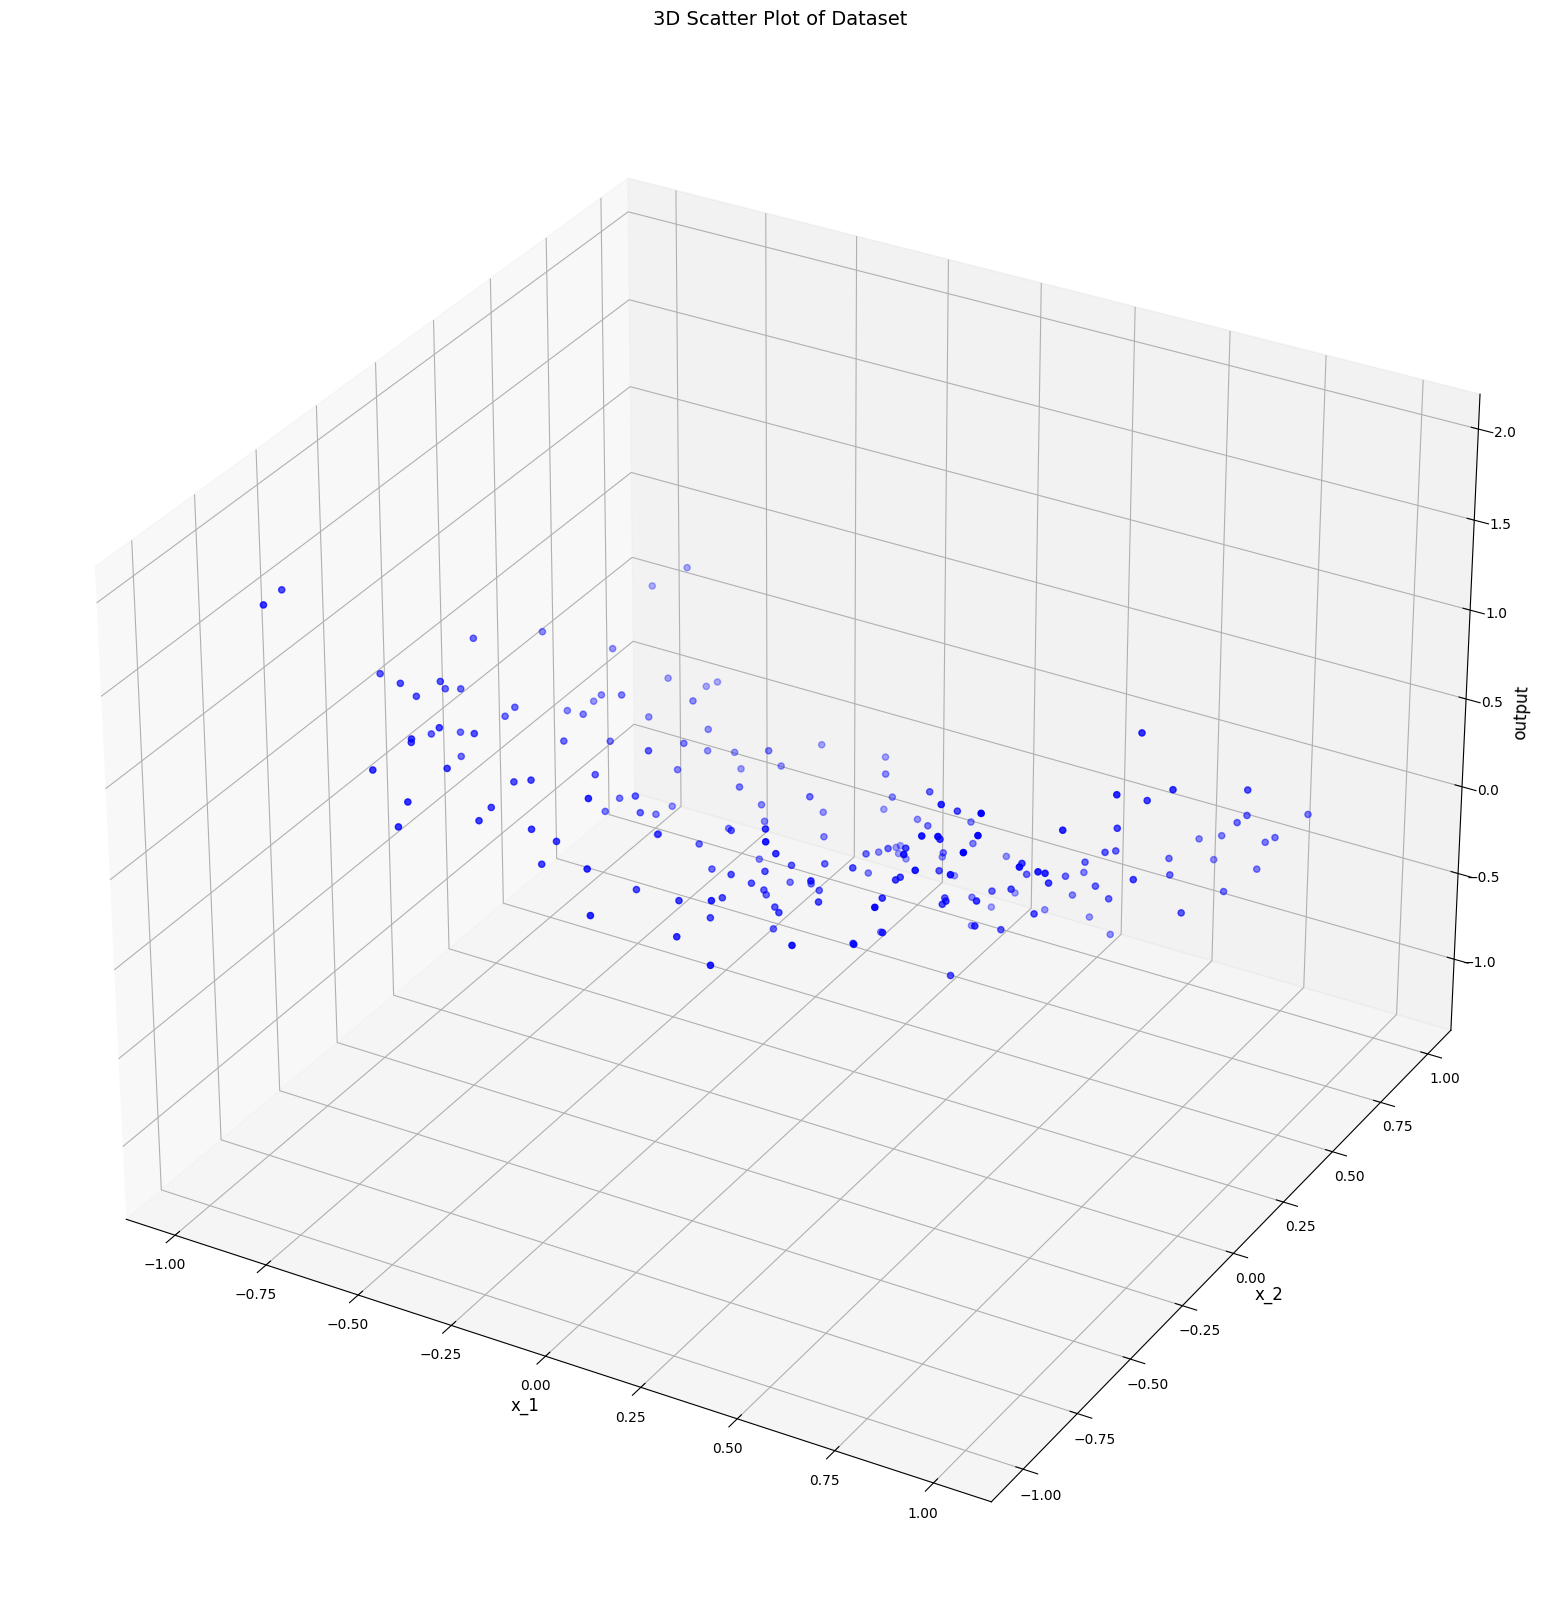

In [10]:
# For the graph
fig = plt.figure(figsize=(20, 20))  # make it large enough for legibility
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(df['x_1'], df['x_2'], df['output'], color='blue', marker='o')

# Axis labels and title with larger font
ax.set_xlabel(df.columns[0], fontsize=12)
ax.set_ylabel(df.columns[1], fontsize=12)
ax.set_zlabel(df.columns[2], fontsize=12)
ax.set_title("3D Scatter Plot of Dataset", fontsize=14, pad=25)

plt.show()



In [ ]:
# To predict if plane or curve
X = df[['x_1', 'x_2']] 
y = df['output']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("R² =", r2)

R² = 0.762529817686938


(b) In addition to the two features in the data file add extra polynomial features
equal to all combinations of powers of the two features up to power 5 (you
can use the sklearn PolynomialFeatures function to do this). Now train Lasso
regression models with these polynomial features for a large range of values of
C e.g. 1, 10, 1000 (you might need to adjust these values for your data, start
by making C small enough that the trained model has all parameters zero, then
increase from there). Report the parameters of the trained models (don’t just
give a list of numbers, say what feature each parameter value corresponds to),
discuss how they change as C is varied

In [12]:
input_poly = df[['x_1', 'x_2']]
output_poly = df['output']

poly = PolynomialFeatures(degree=5, include_bias=False)
input_poly = poly.fit_transform(input_poly)
feature_names = poly.get_feature_names_out(['x_1', 'x_2'])
print("Polynomial feature names:", feature_names)




Polynomial feature names: ['x_1' 'x_2' 'x_1^2' 'x_1 x_2' 'x_2^2' 'x_1^3' 'x_1^2 x_2' 'x_1 x_2^2'
 'x_2^3' 'x_1^4' 'x_1^3 x_2' 'x_1^2 x_2^2' 'x_1 x_2^3' 'x_2^4' 'x_1^5'
 'x_1^4 x_2' 'x_1^3 x_2^2' 'x_1^2 x_2^3' 'x_1 x_2^4' 'x_2^5']


In [28]:
C_values = [0.1, 1, 10, 100, 1000]
nonzero_counts = []
nonzero_ridge_counts = []

for C in C_values:
    alpha = 1 / (2 * C)
    lasso = Lasso(alpha=alpha, max_iter=100000, random_state=42)
    ridge = Ridge(alpha=alpha)
    lasso.fit(input_poly, output_poly)
    ridge.fit(input_poly, output_poly)
    # Count non-zero coefficients
    nonzero_lasso = np.sum(np.abs(lasso.coef_) > 1e-6)
    nonzero_ridge = np.sum(np.abs(ridge.coef_) > 1e-6)
    nonzero_counts.append(nonzero_lasso)
    nonzero_ridge_counts.append(nonzero_ridge)


    # Print model details
    print(f"Lasso:-\n C = {C} ;alpha = {alpha:.5f}")
    print(f"Intercept: {lasso.intercept_:.4f}")
    for fname, coef in zip(feature_names, lasso.coef_):
        if abs(coef) > 1e-6:
            print(f"{fname:15s}:{coef:.4f}")
    print(f"Number of non-zero coefficients: {nonzero_lasso}")
    print(f"\nRidge:-\n C = {C} ;alpha = {alpha:.5f}")
    print(f"Intercept: {ridge.intercept_:.4f}")
    for fname, coef in zip(feature_names, ridge.coef_):
        if abs(coef) > 1e-6:
            print(f"{fname:15s}:{coef:.4f}")
    print(f"Number of non-zero coefficients: {nonzero_ridge}\n")

Lasso:-
 C = 0.1 ;alpha = 5.00000
Intercept: 0.2761
Number of non-zero coefficients: 0

Ridge:-
 C = 0.1 ;alpha = 5.00000
Intercept: 0.0852
x_1            :0.0265
x_2            :-0.7831
x_1^2          :0.4728
x_1 x_2        :0.0259
x_2^2          :0.0035
x_1^3          :0.0235
x_1^2 x_2      :-0.1100
x_1 x_2^2      :-0.0748
x_2^3          :-0.2200
x_1^4          :0.3351
x_1^3 x_2      :0.0015
x_1^2 x_2^2    :0.2036
x_1 x_2^3      :0.0007
x_2^4          :-0.0482
x_1^5          :0.0309
x_1^4 x_2      :-0.0293
x_1^3 x_2^2    :-0.0507
x_1^2 x_2^3    :0.0427
x_1 x_2^4      :-0.0717
x_2^5          :-0.0136
Number of non-zero coefficients: 20

Lasso:-
 C = 1 ;alpha = 0.50000
Intercept: 0.2761
Number of non-zero coefficients: 0

Ridge:-
 C = 1 ;alpha = 0.50000
Intercept: 0.0413
x_1            :0.0212
x_2            :-0.9228
x_1^2          :0.6280
x_1 x_2        :-0.0048
x_2^2          :0.0964
x_1^3          :0.0083
x_1^2 x_2      :-0.1181
x_1 x_2^2      :-0.1361
x_2^3          :-0.2694
x_1^4 

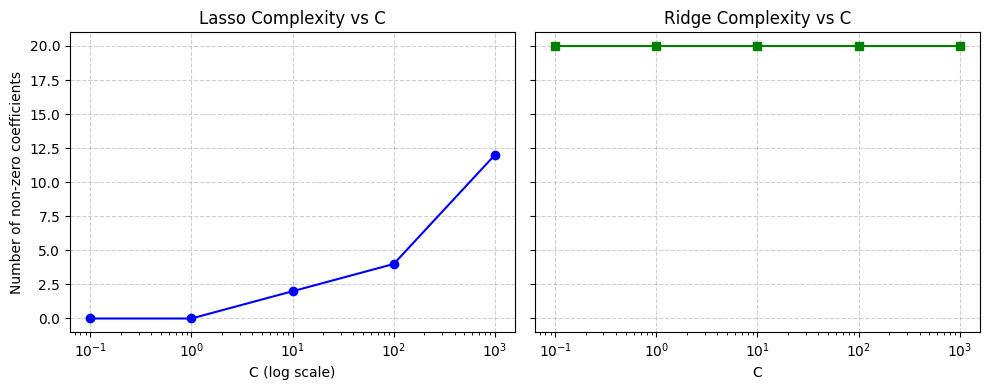

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# --- Lasso plot ---
axes[0].plot(C_values, nonzero_counts, marker='o', color='blue')
axes[0].set_xscale('log')
axes[0].set_xlabel("C")
axes[0].set_ylabel("Number of non-zero coefficients")
axes[0].set_title("Lasso Complexity vs C")
axes[0].grid(True, linestyle='--', alpha=0.6)

# --- Ridge plot ---
axes[1].plot(C_values, nonzero_ridge_counts, marker='s', color='green')
axes[1].set_xscale('log')
axes[1].set_xlabel("C")
axes[1].set_title("Ridge Complexity vs C")
axes[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

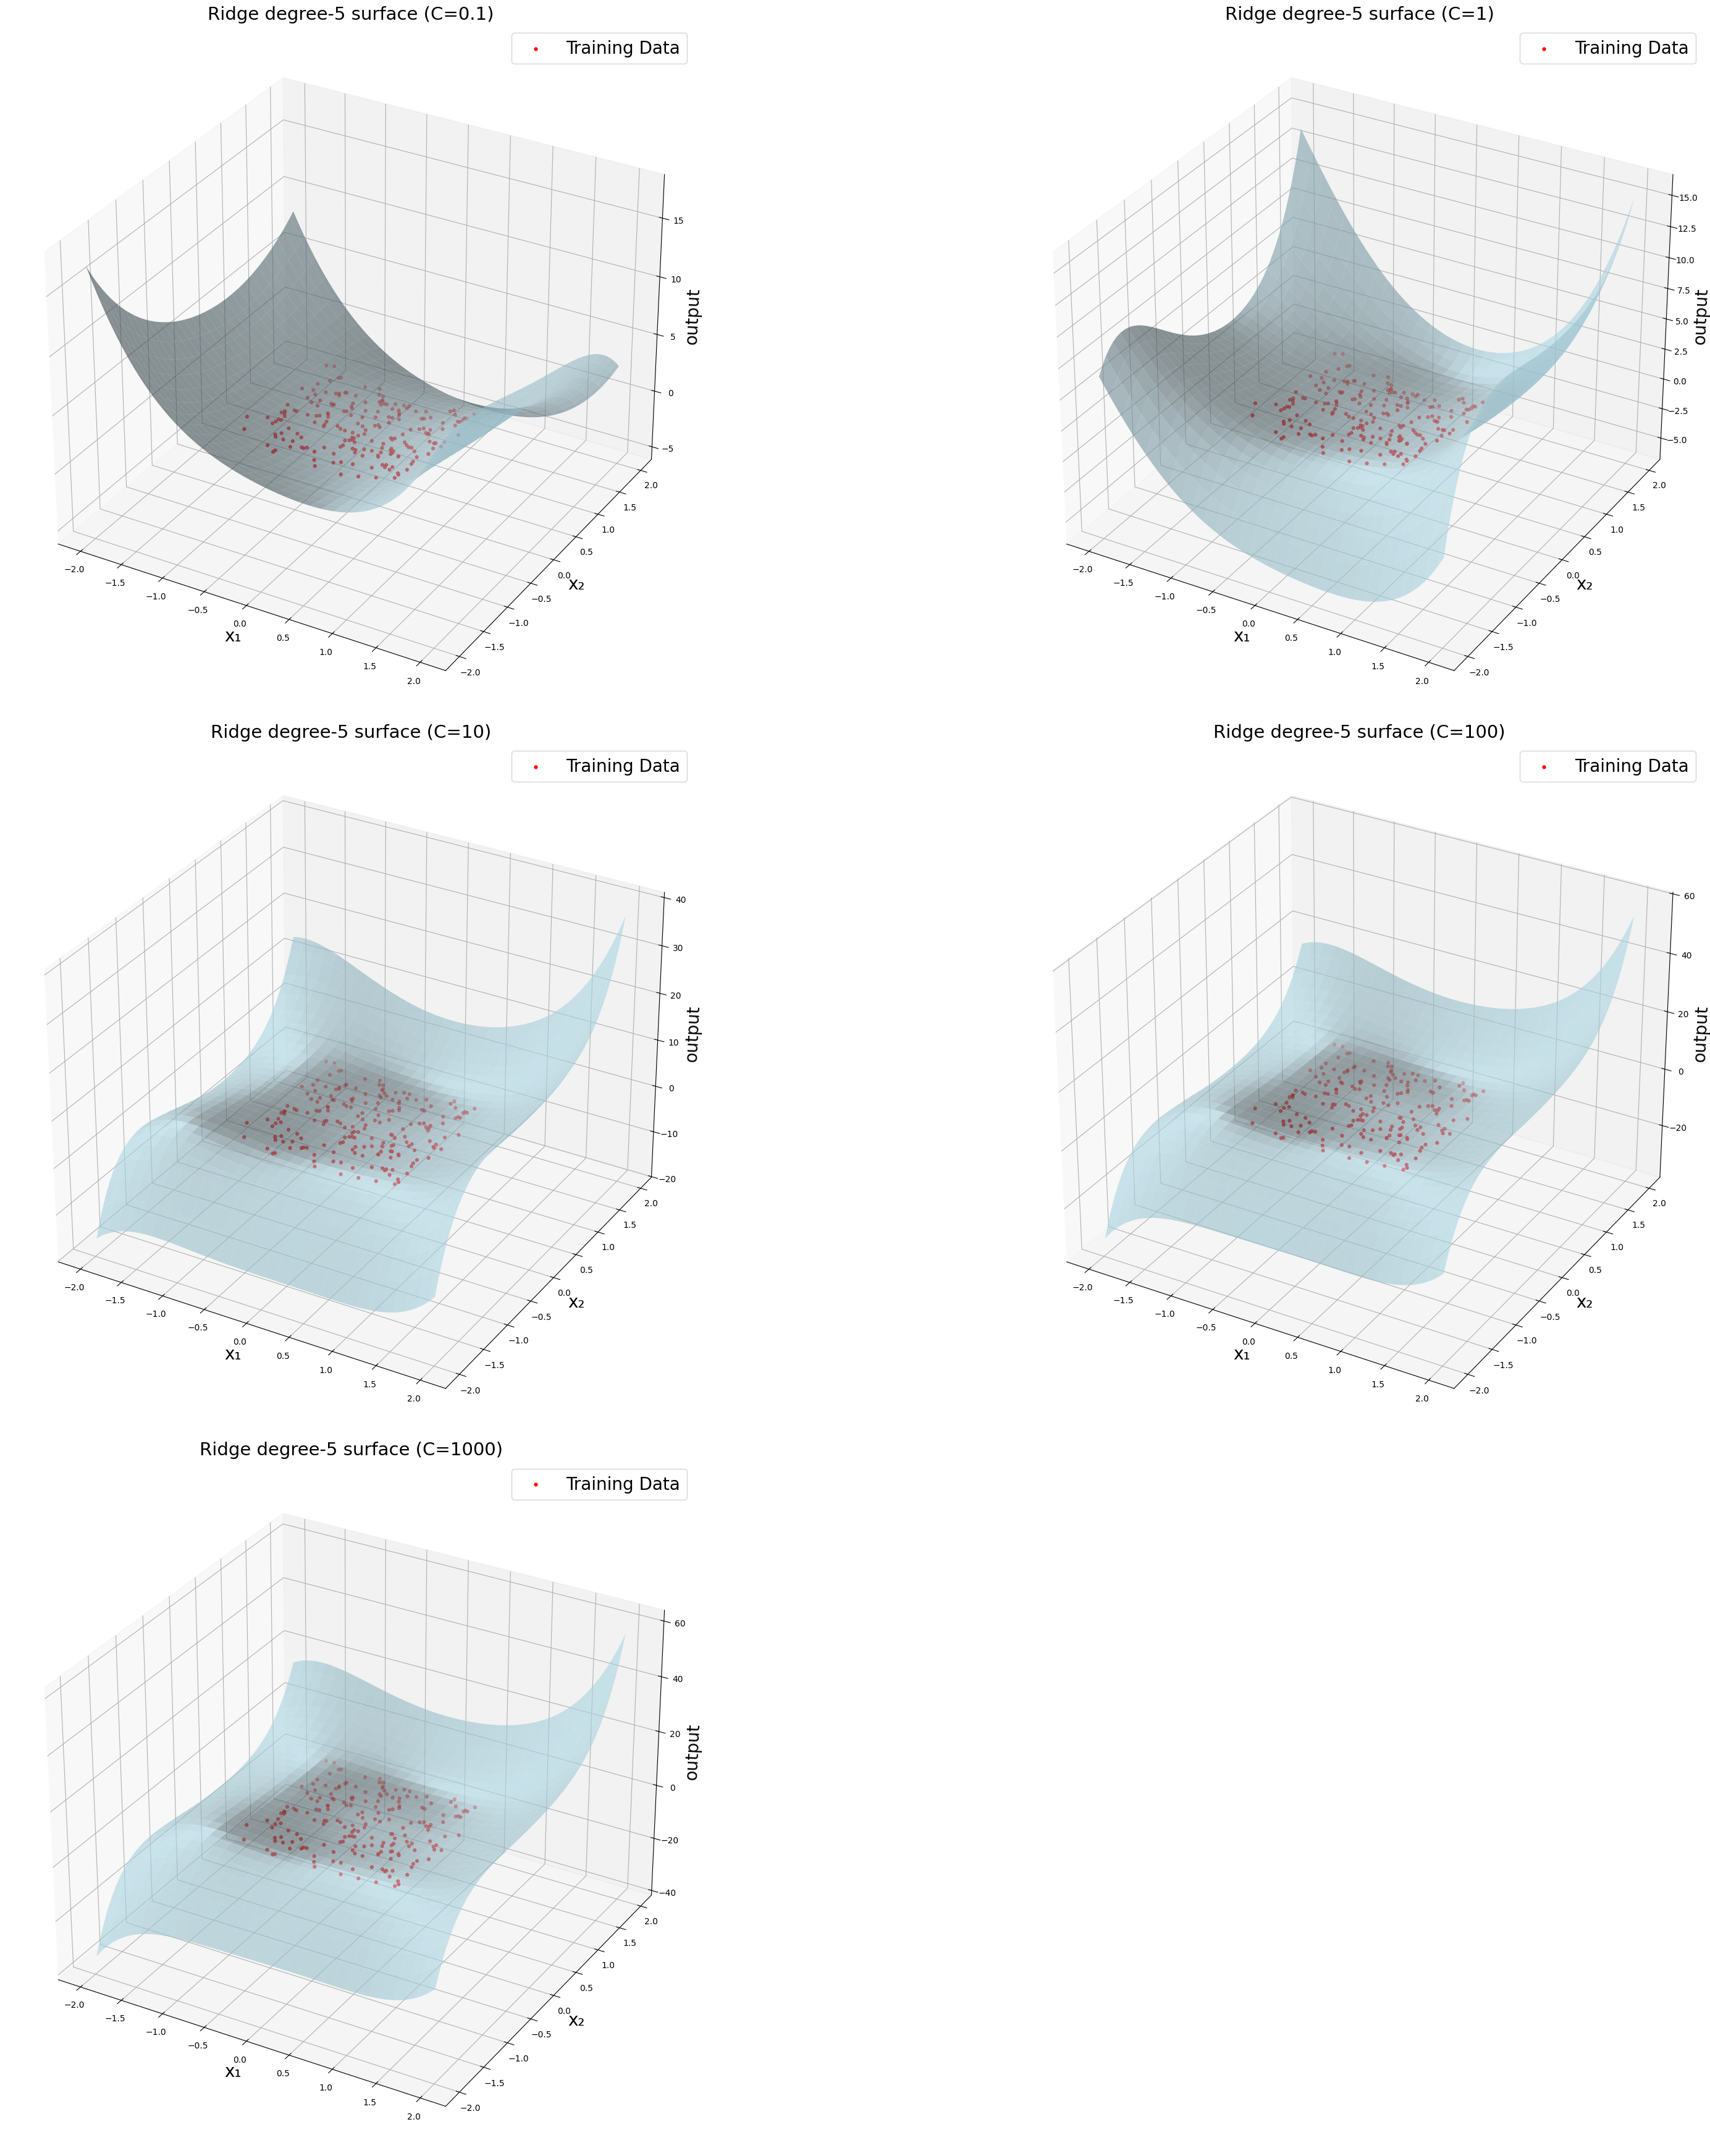

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

def predict_surface(C, model, grid_n=60, pad_factor=0.5):
    alpha = 1 / (2 * C)
    model = model(alpha=alpha, max_iter=200000, random_state=42)
    X_poly = poly.fit_transform(X)
    model.fit(X_poly, y)

    # Define extended grid
    x1_min, x1_max = df["x_1"].min(), df["x_1"].max()
    x2_min, x2_max = df["x_2"].min(), df["x_2"].max()
    r1, r2 = x1_max - x1_min, x2_max - x2_min

    gx = np.linspace(x1_min - pad_factor * r1, x1_max + pad_factor * r1, grid_n)
    gy = np.linspace(x2_min - pad_factor * r2, x2_max + pad_factor * r2, grid_n)
    GX, GY = np.meshgrid(gx, gy)

    X_grid = np.c_[GX.ravel(), GY.ravel()]
    Z = model.predict(poly.transform(X_grid)).reshape(GX.shape)
    return GX, GY, Z

# Define C values to visualize
C_values = [0.1, 1, 10, 100, 1000]

# Create combined figure with 5 subplots 
fig = plt.figure(figsize=(35,35))
for i, C in enumerate(C_values):
    GX, GY, Z = predict_surface(C, Ridge)  # or Ridge
    ax = fig.add_subplot(3, 2, i + 1, projection='3d')
    ax.plot_surface(GX, GY, Z, alpha=0.6, color='lightblue', linewidth=0)
    ax.scatter(df["x_1"], df["x_2"], df["output"], s=12, color='red',label='Training Data')
    ax.set_xlabel("x₁", fontsize=20)
    ax.set_ylabel("x₂", fontsize=20)
    ax.legend(fontsize=20)
    ax.set_zlabel("output", fontsize=20)
    ax.set_title(f"Ridge degree-5 surface (C={C})", fontsize=21)

plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import cross_val_score

for C in C_values:
    alpha = 1 / (2 * C)
    model = Lasso(alpha=alpha, max_iter=200000, random_state=42)
    scores = cross_val_score(model, input_poly, output_poly, cv=5, scoring='r2')
    print(f"C={C:>6} | alpha={alpha:.6f} | Mean R²: {scores.mean():.3f} (+/- {scores.std():.3f})")

C=   0.1 | alpha=5.000000 | Mean R²: -0.049 (+/- 0.052)
C=     1 | alpha=0.500000 | Mean R²: -0.049 (+/- 0.052)
C=    10 | alpha=0.050000 | Mean R²: 0.824 (+/- 0.016)
C=   100 | alpha=0.005000 | Mean R²: 0.908 (+/- 0.025)
C=  1000 | alpha=0.000500 | Mean R²: 0.910 (+/- 0.026)


In [ ]:
X = df[['x_1','x_2']].to_numpy(dtype=float)
y = df['output'].to_numpy(dtype=float)
def cv_graph(model, model_name):
    mean_mse, std_mse = [], []
    C_grid = np.logspace(-2, 4, 20)
    for C in C_grid:
        alpha = 1.0/(2.0*C)
        pipe = make_pipeline(
            poly,
            StandardScaler(with_mean=True, with_std=True),
            model(alpha=alpha, max_iter=200000, random_state=42)
        )
        scores = cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_squared_error')
        mean_mse.append(abs(scores).mean())
        std_mse.append(scores.std())

    plt.figure(figsize=(7,4))
    plt.errorbar(C_grid, mean_mse, yerr=std_mse, fmt='-o', capsize=3)
    plt.xscale('log')
    plt.xlabel('C (log scale)')
    plt.ylabel('CV MSE (mean ± std)')
    plt.title(f'{model_name},deg=5: 5-fold CV Error vs C')
    plt.tight_layout()
    plt.show()
    mean_mse = np.array(mean_mse)
    std_mse = np.array(std_mse)

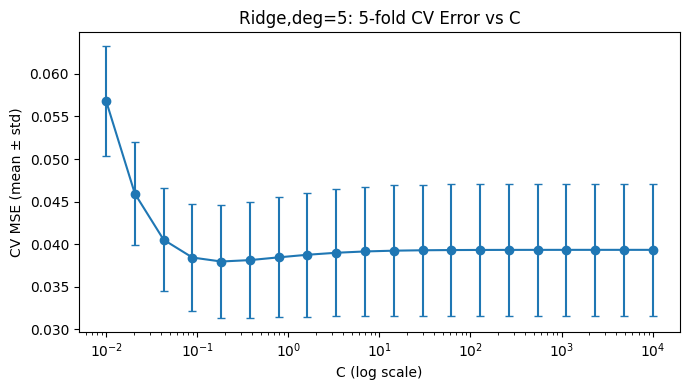

(min mean MSE): 0.1833  |  mean=0.03798  |  std=0.00661


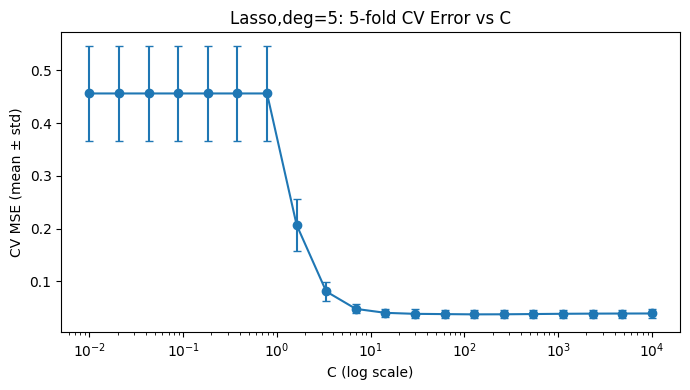

(min mean MSE): 127.4275  |  mean=0.03756  |  std=0.00766


In [24]:
cv_graph(Ridge, "Ridge")
cv_graph(Lasso, "Lasso")